# Nepal --COVID-19 Report

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('nepal_covid.csv')
df

,District,Confirmed,Death,Recovered,X,Y
0,Kapilbastu,705,0,40,83.0469,27.5518
1,Rautahat,1112,0,158,85.3136,27.0487
2,Sarlahi,565,0,55,85.5612,26.9627
3,Dailekh,726,1,35,81.6473,28.9262
4,Banke,344,2,243,81.7787,28.1461
...,...,...,...,...,...,...
72,Manang,1,0,0,84.2308,28.6918
73,Mustang,1,0,0,83.8473,28.9985
74,Okhaldhunga,0,0,0,86.5047,27.3240
75,Rasuwa,0,0,0,85.3136,28.1727


In [5]:
df_time=pd.read_csv('nepal_timeseries.csv')
df_time

,Date,Confirmed,Recovered,Death
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,1,0,0
4,2020-01-26,1,0,0
...,...,...,...,...
143,2020-06-13,5335,913,18
144,2020-06-14,5760,974,19
145,2020-06-15,6211,1041,19
146,2020-06-16,6591,1158,19


In [6]:
t_confirm=df['Confirmed'].sum()
t_death=df['Death'].sum()
t_recover=df['Recovered'].sum()
t_active=t_confirm-(t_death+t_recover)
bar_data=[t_confirm,t_active,t_recover]
months=['January','February','MArch','April','May','June']
tick=['Confirmed','Active','Recovered']

In [7]:
plt.style.use('fivethirtyeight')

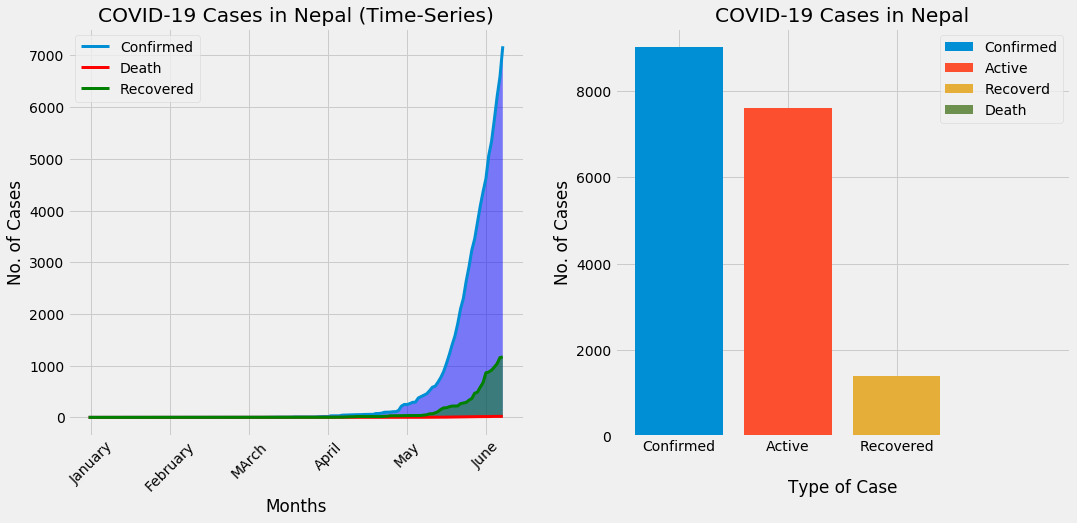

In [8]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(df_time['Date'],df_time['Confirmed'],label='Confirmed',linewidth=3)
plt.plot(df_time['Date'],df_time['Death'],label='Death',c='r',linewidth=3)
plt.plot(df_time['Date'],df_time['Recovered'],label='Recovered',linewidth=3,c='g')
plt.legend()
plt.xticks(range(1,148,28),months,rotation=45)
plt.xlabel('Months')
plt.ylabel('No. of Cases')
plt.title('COVID-19 Cases in Nepal (Time-Series)')
plt.fill_between(df_time.index,df_time['Confirmed'],facecolor='b', alpha=0.5)
plt.fill_between(df_time.index,df_time['Recovered'],facecolor='g', alpha=0.5)

plt.subplot(1,2,2)
plt.bar(1,t_confirm,label='Confirmed')
plt.bar(2,t_active,label='Active')
plt.bar(3,t_recover,label='Recoverd')
plt.bar(4,t_death,label='Death')
plt.xlabel('\nType of Case')
plt.ylabel('No. of Cases')
plt.title('COVID-19 Cases in Nepal')
plt.xticks(range(1,4,1),tick)
plt.legend()

In [9]:
df_dis=pd.read_csv('my_nepal.csv')
#merge dataframes (covid data and adminstrative data)
df_n=pd.merge(df_dis,df)
df_n

,Province,District,District code,X,Y,Confirmed,Death,Recovered
0,PROVINCE 1,Taplejung,101,87.7763,27.6257,4,0,3
1,PROVINCE 1,Sankhuwasabha,102,87.1423,27.6142,2,0,2
2,PROVINCE 1,Solukhumbu,103,86.6611,27.7910,1,0,1
3,PROVINCE 1,Okhaldhunga,104,86.5047,27.3240,0,0,0
4,PROVINCE 1,Khotang,105,86.8220,27.2317,4,0,1
...,...,...,...,...,...,...,...,...
71,SUDURPASHCHIM,Dadeldhura,705,80.4994,29.2188,185,0,6
72,SUDURPASHCHIM,Doti,706,80.8987,29.2006,141,0,1
73,SUDURPASHCHIM,Achham,707,81.2519,29.0396,74,0,2
74,SUDURPASHCHIM,Kailali,708,80.8092,28.7413,232,3,11


In [10]:
state_rec=df_n.groupby(['Province']).aggregate({'Confirmed':np.sum,'Death':np.sum,'Recovered':np.sum})
state_rec['Active']=state_rec['Confirmed']-(state_rec['Death']+state_rec['Recovered'])
state_rec.sort_values(['Death'],inplace=True)
state_rec

,Confirmed,Death,Recovered,Active
Province,,,,
PROVINCE 1,452,0,223,229
GANDAKI,524,1,14,509
KARNALI,1278,3,100,1175
PROVINCE 2,3028,3,593,2432
PROVINCE 3,302,4,48,250
SUDURPASHCHIM,971,4,27,940
PROVINCE 5,2469,7,393,2069


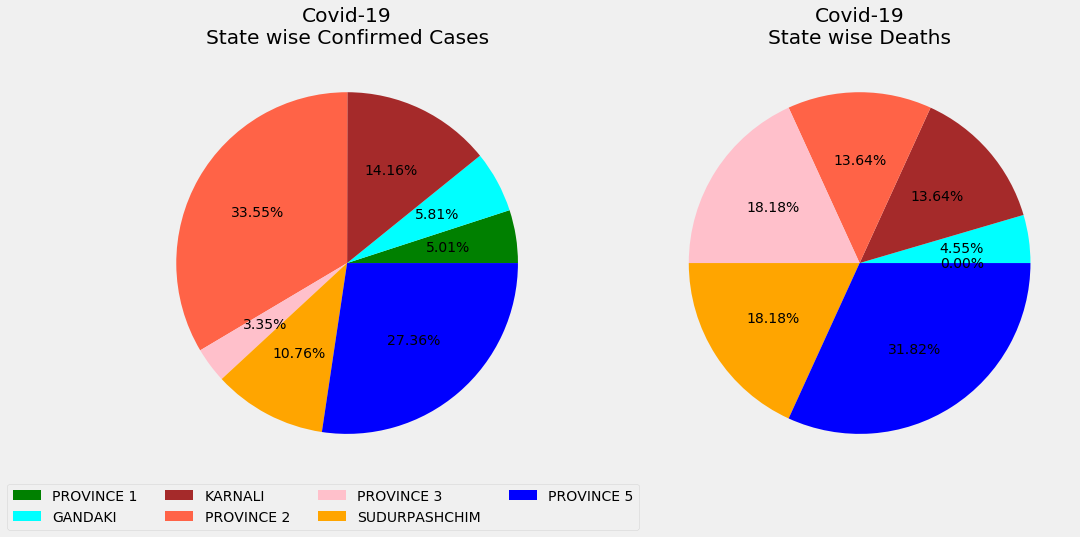

In [11]:
plt.style.use('seaborn-bright')
c = ( "green", "cyan", "brown","tomato", "pink", "orange",'blue') 

theme = plt.get_cmap('hsv')
plt.figure(figsize=(15,12))


plt.subplot(1,2,1)
plt.pie(state_rec['Confirmed'],labels=None,autopct='%.2f%%',colors=c)
plt.title('Covid-19\nState wise Confirmed Cases')
plt.subplot(1,2,2)
plt.pie(state_rec['Death'],labels=None,autopct='%.2f%%',colors=c)
plt.title('Covid-19\nState wise Deaths')
plt.legend(labels=state_rec.index,ncol=4,bbox_to_anchor=(0, 0))

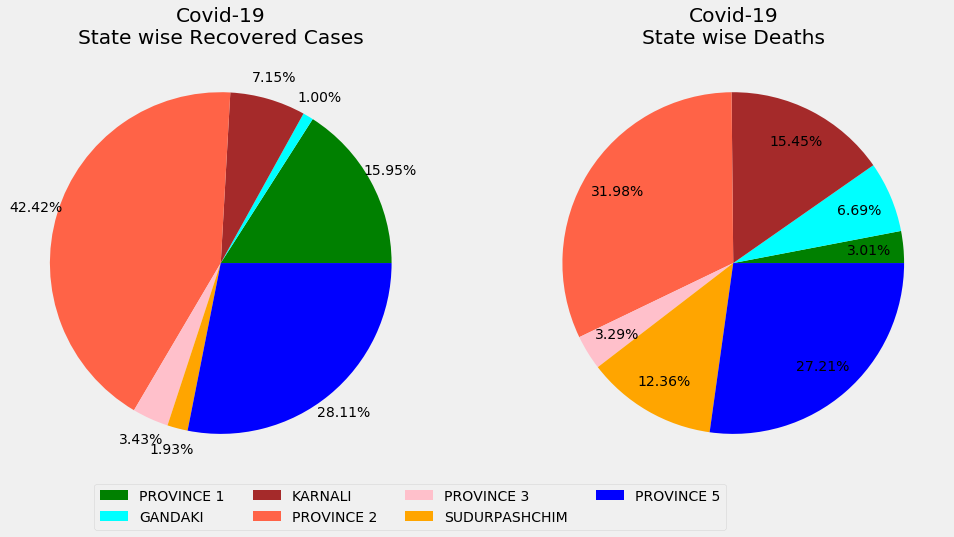

In [12]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.pie(state_rec['Recovered'],labels=None,autopct='%.2f%%',pctdistance=1.13,colors=c)
plt.title('Covid-19\nState wise Recovered Cases')

plt.subplot(1,2,2)
plt.pie(state_rec['Active'],labels=None,autopct='%.2f%%',pctdistance=0.8,colors=c)
plt.title('Covid-19\nState wise Deaths')
plt.legend(labels=state_rec.index,ncol=4,bbox_to_anchor=(0.5, 0))

In [16]:
import mplleaflet

In [18]:
c=[]
for data in df_n['Confirmed']:
    if data>500:c.append('r')
    elif data>100:c.append('y')
    elif data>10:c.append('b')
    else:c.append('g')
#colors=np.where(df_n['Confirmed']>500,'r','y')

In [19]:
#map don't render on github, need to open with nbviewer
lons = df_n['X'].tolist()
lats = df_n['Y'].tolist()
plt.figure(figsize=(10,10))
scatter=plt.scatter(lons, lats,c=c,alpha=0.7, s=df_n['Confirmed']*5)
labels=['Cases>500','Cases>100','Cases>10','Cases<10']

#plt.legend(labels=labels)
mplleaflet.display()

/root/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
